In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from relational_embedder.data_prep import data_prep_utils as dpu
import numpy as np
from relational_embedder import api
from relational_embedder.api import Fabric
from relational_embedder.api import SIMF
import word2vec
import pickle
import itertools
path_to_row_we_model = 'models/db2vec_75_first/we_db2vec_75_ns50_fns20_i40.bin'
row_we_model = word2vec.load(path_to_row_we_model)
path_to_row_relemb = 'models/db2vec_75_first/relemb/row.pkl'
word_hubness_path = "models/db2vec_75_first/relemb/hubness.pkl"
with open(word_hubness_path, "rb") as f:
    word_hubness = pickle.load(f)
with open(path_to_row_relemb, "rb") as f:
    row_relemb = pickle.load(f)
fabric = Fabric(row_we_model, None, row_relemb, None, None, word_hubness)

In [12]:
# vis imports
#import matplotlib
#matplotlib.use('Agg')
import hypertools as hyp
from collections import defaultdict
%matplotlib inline

In [5]:
list_of_arrays = fabric.M_R.vectors

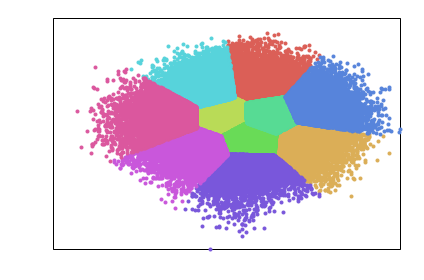

In [6]:
hyp.plot(list_of_arrays, '.', ndims=2, n_clusters=10)

## plotting all relations

#### this is done on the benchmark data and not the entire mit dwh

In [7]:
# get relations
all_rels = []
all_vecs = []
for relation in fabric.RE_R.keys():
    all_rels.append(relation)
    v = fabric.RE_R[relation]['vector']
    all_vecs.append(v)
all_rels = np.asarray(all_rels)
all_vecs = np.asarray(all_vecs)

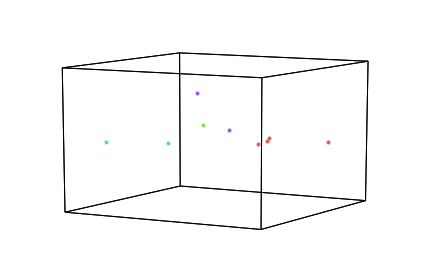

In [8]:
hyp.plot(all_vecs, '.', ndims=3, n_clusters=4)

## plotting all rows

In [17]:
# get rows
all_labels = []
all_rows = []
sampler = 0
last_relation = None
for vec, relation, row_idx in fabric.row_iterator_r():
    sampler += 1
    if sampler > 100:
        if relation != last_relation:
            sampler = 0
        continue
    else:
        last_relation = relation
    all_labels.append(relation)
    all_rows.append(vec)
all_rows = np.asarray(all_rows)

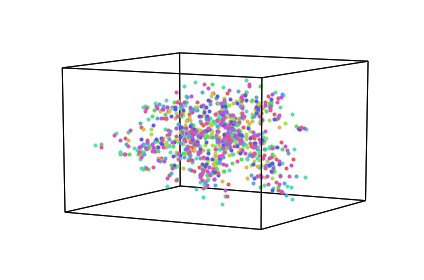

In [20]:
hyp.plot(all_rows, '.', ndims=3, hue=all_labels)

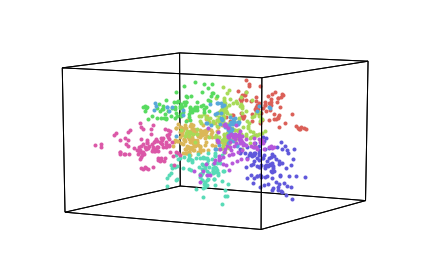

In [25]:
hyp.plot(all_rows, '.', ndims=3, n_clusters=9)